In [52]:
import sys
import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
import tqdm
from tqdm import tqdm_notebook

In [53]:
query_txt="트럼프"
start_date="20200701"
end_date="20200723"

In [54]:
pwd

'C:\\Users\\clubc\\Desktop\\python_basic'

In [55]:
path = "chromedriver.exe"

driver = webdriver.Chrome(path)
driver.get('http://www.naver.com')
time.sleep(2)

element = driver.find_element_by_id("query")
element.send_keys(query_txt)
element.submit()
driver.find_element_by_link_text("뉴스").click()

In [56]:
titles = " ._sp_each_title"
article_raw = driver.find_elements_by_css_selector(titles)
article_raw[0].text

'1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)'

In [59]:
overlays = "._sp_each_url"                                 
urls = driver.find_elements_by_css_selector(overlays)
urls[0].get_attribute('href')

'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=104&oid=001&aid=0011787049'

In [60]:
url_list = []
title_list = []

total_page = 10
for i in tqdm_notebook(range(0, total_page)):
    i = i * 10 + 1
    url = "https://search.naver.com/search.naver?&where=news&query={0}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=0&ds=&de=&docid=&nso=so:r,p:all,a:all&mynews=0&cluster_rank=85&start={1}".format(query_txt, i)
    driver.get(url)
    time.sleep(0.5)
    
    
    titles = "._sp_each_title"
    articles = "._sp_each_url"
    article_raw = driver.find_elements_by_css_selector(titles)
    article_list = driver.find_elements_by_css_selector(articles)
   
    # url 크롤링 시작
    for article in article_raw:
        url = article.get_attribute('href')   
        url_list.append(url)
    
    # 제목 크롤링 시작    
    for article in article_raw:
        title = article.text   
        title_list.append(title)
    
        print(title)
    
print('url갯수: ', len(url_list))

df = pd.DataFrame({'url':url_list, 'title':title_list})

# 저장하기
df.to_excel("news_url.xlsx")

1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)
"트럼프, 틱톡 45일 내 매각 지시"…틱톡 "법률 이용해 권익 지킬 것"
트럼프, 틱톡 퇴출…‘미운털’ 중국·빌 게이츠 한번에 손본다
트럼프, “45일내에 틱톡 매각 협상 끝내라”
트럼프 "틱톡 OUT" 이틀 만에... MS "9월 15일까지 인수협상 마무리할 것"
트럼프 대선연기 후퇴 속 백악관 "대선 11월3일"
[속보] "트럼프, 中 바이트댄스에 '45일 내 MS에 틱톡 넘겨라' 통보"
한 발 뺀 트럼프…백악관 "대선 일정 변동 없어"
트럼프 틱톡 금지, 빌 게이츠 저격 일석이조 노렸나
트럼프 '대선 연기론', 지지자들에게 행동 지침 전달?
트럼프 대선연기 후퇴 속 백악관 "대선 11월3일"
1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)
[단독]볼턴 "트럼프, 文에 수차례 주한미군 감축 분명히 암시"
지지율 하락 이유, 트럼프만 모른다
트럼프 대선후보 지명식에 '언론 입장금지'
또 중국 때리는 트럼프 "틱톡, 미국 내 접속 막겠다"
흑인·청년 투표율 높일라… ‘우편투표’ 때리는 트럼프
"트럼프, 대선 져도 정권이양 않고 비상 방식 동원할 것"
[이 시각 세계] "트럼프, 中 소프트웨어 기업 며칠내 조치할 것"
[속보] "트럼프, 中 바이트댄스에 '45일 내 MS에 틱톡 넘겨라' 통보"
45년만의 美 우주인 해상귀환‥트럼프 "매우 흥분"
<시론>文정부 ‘트럼프 베팅’ 위험하다
트럼프 "틱톡, 이르면 8월부터 사용금지"
볼턴, 주독미군 감축 반대···"트럼프는 시진핑·김정은 상대 좋아해"
틱톡만? 트럼프, 위챗도 때린다…폼페이오 "中 IT기업 곧 조치"
트럼프, '보스턴 테러범' 항소법원 감경 판결 비판…사형 촉구
[세계NOW] "트럼프 대선연기론, 美현지 어떻게 반응했을까"
‘외톨이’ 트럼프? “아무도 날 안 좋아해” 한탄
트럼프의 표리부동?...美 코로나 지원금 5000억원, 中기업에 갔다
중국이 만든 '틱톡'…트럼프는 사용 금지, MS는 인수설
미국, 틱톡

In [61]:
import sys
import os
import pandas as pd
import numpy as np

In [62]:
# "news_url.csv" 불러오기
url_load = pd.read_excel("news_url.xlsx")

num_list = len(url_load)

print(num_list)
url_load

100


,Unnamed: 0,url,title
0,0,http://yna.kr/AKR20200803003051087?did=1195m,1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)
1,1,http://news.tvchosun.com/site/data/html_dir/20...,"""트럼프, 틱톡 45일 내 매각 지시""…틱톡 ""법률 이용해 권익 지킬 것"""
2,2,https://news.joins.com/article/olink/23433869,"트럼프, 틱톡 퇴출…‘미운털’ 중국·빌 게이츠 한번에 손본다"
3,3,http://www.hani.co.kr/arti/international/inter...,"트럼프, “45일내에 틱톡 매각 협상 끝내라”"
4,4,https://hankookilbo.com/News/Read/A20200803085...,"트럼프 ""틱톡 OUT"" 이틀 만에... MS ""9월 15일까지 인수협상 마무리할 것"""
5,5,http://www.yonhapnewstv.co.kr/MYH2020080300560...,"트럼프 대선연기 후퇴 속 백악관 ""대선 11월3일"""
6,6,https://biz.chosun.com/site/data/html_dir/2020...,"[속보] ""트럼프, 中 바이트댄스에 '45일 내 MS에 틱톡 넘겨라' 통보"""
7,7,https://imnews.imbc.com/replay/2020/nwtoday/ar...,"한 발 뺀 트럼프…백악관 ""대선 일정 변동 없어"""
8,8,https://www.nocutnews.co.kr/news/5388167,"트럼프 틱톡 금지, 빌 게이츠 저격 일석이조 노렸나"
9,9,https://www.pressian.com/pages/articles/202008...,"트럼프 '대선 연기론', 지지자들에게 행동 지침 전달?"


# 기사 제목 텍스트 분석

In [63]:
import scipy as sp
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()  
rc('font', family=font_name)

# 워닝 없애주기
import warnings

In [64]:
# 한글 자연어 처리 라이브러리
from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle

In [65]:
df_r = pd.read_excel("news_url.xlsx")
df_r

,Unnamed: 0,url,title
0,0,http://yna.kr/AKR20200803003051087?did=1195m,1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)
1,1,http://news.tvchosun.com/site/data/html_dir/20...,"""트럼프, 틱톡 45일 내 매각 지시""…틱톡 ""법률 이용해 권익 지킬 것"""
2,2,https://news.joins.com/article/olink/23433869,"트럼프, 틱톡 퇴출…‘미운털’ 중국·빌 게이츠 한번에 손본다"
3,3,http://www.hani.co.kr/arti/international/inter...,"트럼프, “45일내에 틱톡 매각 협상 끝내라”"
4,4,https://hankookilbo.com/News/Read/A20200803085...,"트럼프 ""틱톡 OUT"" 이틀 만에... MS ""9월 15일까지 인수협상 마무리할 것"""
5,5,http://www.yonhapnewstv.co.kr/MYH2020080300560...,"트럼프 대선연기 후퇴 속 백악관 ""대선 11월3일"""
6,6,https://biz.chosun.com/site/data/html_dir/2020...,"[속보] ""트럼프, 中 바이트댄스에 '45일 내 MS에 틱톡 넘겨라' 통보"""
7,7,https://imnews.imbc.com/replay/2020/nwtoday/ar...,"한 발 뺀 트럼프…백악관 ""대선 일정 변동 없어"""
8,8,https://www.nocutnews.co.kr/news/5388167,"트럼프 틱톡 금지, 빌 게이츠 저격 일석이조 노렸나"
9,9,https://www.pressian.com/pages/articles/202008...,"트럼프 '대선 연기론', 지지자들에게 행동 지침 전달?"


In [66]:
df_r['title']

0             1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)
1           "트럼프, 틱톡 45일 내 매각 지시"…틱톡 "법률 이용해 권익 지킬 것"
2                   트럼프, 틱톡 퇴출…‘미운털’ 중국·빌 게이츠 한번에 손본다
3                           트럼프, “45일내에 틱톡 매각 협상 끝내라”
4     트럼프 "틱톡 OUT" 이틀 만에... MS "9월 15일까지 인수협상 마무리할 것"
5                        트럼프 대선연기 후퇴 속 백악관 "대선 11월3일"
6          [속보] "트럼프, 中 바이트댄스에 '45일 내 MS에 틱톡 넘겨라' 통보"
7                         한 발 뺀 트럼프…백악관 "대선 일정 변동 없어"
8                        트럼프 틱톡 금지, 빌 게이츠 저격 일석이조 노렸나
9                      트럼프 '대선 연기론', 지지자들에게 행동 지침 전달?
10                       트럼프 대선연기 후퇴 속 백악관 "대선 11월3일"
11            1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)
12                [단독]볼턴 "트럼프, 文에 수차례 주한미군 감축 분명히 암시"
13                                지지율 하락 이유, 트럼프만 모른다
14                            트럼프 대선후보 지명식에 '언론 입장금지'
15                     또 중국 때리는 트럼프 "틱톡, 미국 내 접속 막겠다"
16                      흑인·청년 투표율 높일라… ‘우편투표’ 때리는 트럼프
17                   "트럼프, 대선 져도 정권이양 않고 비상 방식 동원할 것"
18              [이 시각 세계] "트

In [67]:
title_list = df_r.title.values.tolist()

print(len(title_list))
title_list

100


['1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)',
 '"트럼프, 틱톡 45일 내 매각 지시"…틱톡 "법률 이용해 권익 지킬 것"',
 '트럼프, 틱톡 퇴출…‘미운털’ 중국·빌 게이츠 한번에 손본다',
 '트럼프, “45일내에 틱톡 매각 협상 끝내라”',
 '트럼프 "틱톡 OUT" 이틀 만에... MS "9월 15일까지 인수협상 마무리할 것"',
 '트럼프 대선연기 후퇴 속 백악관 "대선 11월3일"',
 '[속보] "트럼프, 中 바이트댄스에 \'45일 내 MS에 틱톡 넘겨라\' 통보"',
 '한 발 뺀 트럼프…백악관 "대선 일정 변동 없어"',
 '트럼프 틱톡 금지, 빌 게이츠 저격 일석이조 노렸나',
 "트럼프 '대선 연기론', 지지자들에게 행동 지침 전달?",
 '트럼프 대선연기 후퇴 속 백악관 "대선 11월3일"',
 '1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)',
 '[단독]볼턴 "트럼프, 文에 수차례 주한미군 감축 분명히 암시"',
 '지지율 하락 이유, 트럼프만 모른다',
 "트럼프 대선후보 지명식에 '언론 입장금지'",
 '또 중국 때리는 트럼프 "틱톡, 미국 내 접속 막겠다"',
 '흑인·청년 투표율 높일라… ‘우편투표’ 때리는 트럼프',
 '"트럼프, 대선 져도 정권이양 않고 비상 방식 동원할 것"',
 '[이 시각 세계] "트럼프, 中 소프트웨어 기업 며칠내 조치할 것"',
 '[속보] "트럼프, 中 바이트댄스에 \'45일 내 MS에 틱톡 넘겨라\' 통보"',
 '45년만의 美 우주인 해상귀환‥트럼프 "매우 흥분"',
 '<시론>文정부 ‘트럼프 베팅’ 위험하다',
 '트럼프 "틱톡, 이르면 8월부터 사용금지"',
 '볼턴, 주독미군 감축 반대···"트럼프는 시진핑·김정은 상대 좋아해"',
 '틱톡만? 트럼프, 위챗도 때린다…폼페이오 "中 IT기업 곧 조치"',
 "트럼프, '보스턴 테러범' 항소법원 감경 판결 비판…사형 촉구",
 '[세계NOW] "트럼프 대선연기론, 美현지 어떻게 반응

In [68]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [69]:
# 리스트 중 str 타입이 아닌 요소 존재 확인
for i in title_list:
    if type(i) == float:
        i = str(i)
        print(i)

In [70]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 변경
for i in range(len(title_list)):
    if type(title_list[i]) != str:
        title_list[i] = str(title_list[i])

In [71]:
content_text = ''

for each_line in title_list[:2000]:
    content_text = content_text + each_line + '\n'

In [72]:
content_text

'1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)\n"트럼프, 틱톡 45일 내 매각 지시"…틱톡 "법률 이용해 권익 지킬 것"\n트럼프, 틱톡 퇴출…‘미운털’ 중국·빌 게이츠 한번에 손본다\n트럼프, “45일내에 틱톡 매각 협상 끝내라”\n트럼프 "틱톡 OUT" 이틀 만에... MS "9월 15일까지 인수협상 마무리할 것"\n트럼프 대선연기 후퇴 속 백악관 "대선 11월3일"\n[속보] "트럼프, 中 바이트댄스에 \'45일 내 MS에 틱톡 넘겨라\' 통보"\n한 발 뺀 트럼프…백악관 "대선 일정 변동 없어"\n트럼프 틱톡 금지, 빌 게이츠 저격 일석이조 노렸나\n트럼프 \'대선 연기론\', 지지자들에게 행동 지침 전달?\n트럼프 대선연기 후퇴 속 백악관 "대선 11월3일"\n1900도 고열 견딘 캡슐 바다에 첨벙…무사귀환에 트럼프도 환영(종합)\n[단독]볼턴 "트럼프, 文에 수차례 주한미군 감축 분명히 암시"\n지지율 하락 이유, 트럼프만 모른다\n트럼프 대선후보 지명식에 \'언론 입장금지\'\n또 중국 때리는 트럼프 "틱톡, 미국 내 접속 막겠다"\n흑인·청년 투표율 높일라… ‘우편투표’ 때리는 트럼프\n"트럼프, 대선 져도 정권이양 않고 비상 방식 동원할 것"\n[이 시각 세계] "트럼프, 中 소프트웨어 기업 며칠내 조치할 것"\n[속보] "트럼프, 中 바이트댄스에 \'45일 내 MS에 틱톡 넘겨라\' 통보"\n45년만의 美 우주인 해상귀환‥트럼프 "매우 흥분"\n<시론>文정부 ‘트럼프 베팅’ 위험하다\n트럼프 "틱톡, 이르면 8월부터 사용금지"\n볼턴, 주독미군 감축 반대···"트럼프는 시진핑·김정은 상대 좋아해"\n틱톡만? 트럼프, 위챗도 때린다…폼페이오 "中 IT기업 곧 조치"\n트럼프, \'보스턴 테러범\' 항소법원 감경 판결 비판…사형 촉구\n[세계NOW] "트럼프 대선연기론, 美현지 어떻게 반응했을까"\n‘외톨이’ 트럼프? “아무도 날 안 좋아해” 한탄\n트럼프의 표리부동?...美 코로나 지원금 5000억원, 中기업에 갔다

## 형태소분석을 마친 단어로 (token_ko)

In [73]:
tokens_ko = t.morphs(content_text) # 명사 분석 
tokens_ko

['1900',
 '도',
 '고열',
 '견딘',
 '캡슐',
 '바다',
 '에',
 '첨벙',
 '…',
 '무사',
 '귀환',
 '에',
 '트럼프',
 '도',
 '환영',
 '(',
 '종합',
 ')',
 '\n',
 '"',
 '트럼프',
 ',',
 '틱톡',
 '45일',
 '내',
 '매각',
 '지시',
 '"…',
 '틱톡',
 '"',
 '법률',
 '이용',
 '해',
 '권익',
 '지킬',
 '것',
 '"',
 '\n',
 '트럼프',
 ',',
 '틱톡',
 '퇴',
 '출',
 '…',
 '‘',
 '미운',
 '털',
 '’',
 '중국',
 '·',
 '빌',
 '게이츠',
 '한번',
 '에',
 '손',
 '본다',
 '\n',
 '트럼프',
 ',',
 '“',
 '45일',
 '내에',
 '틱톡',
 '매각',
 '협상',
 '끝내',
 '라',
 '”',
 '\n',
 '트럼프',
 '"',
 '틱톡',
 'OUT',
 '"',
 '이틀',
 '만에',
 '...',
 'MS',
 '"',
 '9월',
 '15일',
 '까지',
 '인수',
 '협상',
 '마무리',
 '할',
 '것',
 '"',
 '\n',
 '트럼프',
 '대선',
 '연기',
 '후퇴',
 '속',
 '백악관',
 '"',
 '대선',
 '11월',
 '3일',
 '"',
 '\n',
 '[',
 '속보',
 ']',
 '"',
 '트럼프',
 ',',
 '中',
 '바이트',
 '댄스',
 '에',
 "'",
 '45일',
 '내',
 'MS',
 '에',
 '틱톡',
 '넘겨라',
 "'",
 '통보',
 '"',
 '\n',
 '한',
 '발',
 '뺀',
 '트럼프',
 '…',
 '백악관',
 '"',
 '대선',
 '일정',
 '변동',
 '없어',
 '"',
 '\n',
 '트럼프',
 '틱톡',
 '금지',
 ',',
 '빌',
 '게이츠',
 '저격',
 '일석이조',
 '노렸나',
 '\n',
 '트럼프',
 "'",


In [74]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

1456
514


In [75]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개 선정

[('트럼프', 100),
 ('\n', 100),
 ('"', 99),
 (',', 47),
 ("'", 37),
 ('대선', 31),
 ('에', 26),
 ('틱톡', 26),
 ('…', 21),
 ('연기', 21),
 ('것', 17),
 ('투표', 15),
 ('‘', 14),
 ('금지', 14),
 ('[', 11),
 (']', 11),
 ('우편', 11),
 ('“', 10),
 ('”', 10),
 ('는', 10),
 ('의', 10),
 ('도', 9),
 ('’', 9),
 ('중국', 9),
 ('미군', 9),
 ('감축', 9),
 ('내', 8),
 ('협상', 8),
 ('할', 8),
 ('?', 8),
 ('美', 8),
 ('주독', 8),
 ('미국', 7),
 ('종합', 6),
 (')', 6),
 ('MS', 6),
 ('사용', 6),
 ('안', 6),
 ('로', 6),
 ('(', 5),
 ('"…', 5),
 ('·', 5),
 ('백악관', 5),
 ('속보', 5),
 ('中', 5),
 ('한', 5),
 ('비', 5),
 ('45일', 4),
 ('해', 4),
 ('인수', 4),
 ('언론', 4),
 ('기업', 4),
 ('조치', 4),
 ('부터', 4),
 ('코로나', 4),
 ('사기', 4),
 ('미', 4),
 ('할까', 4),
 ('선거', 4),
 ('방위', 4),
 ('귀환', 3),
 ('환영', 3),
 ('매각', 3),
 ('빌', 3),
 ('까지', 3),
 ('속', 3),
 ('11월', 3),
 ('바이트', 3),
 ('댄스', 3),
 ('통보', 3),
 ('볼턴', 3),
 ('이', 3),
 ('소프트웨어', 3),
 ('8월', 3),
 ('1일', 3),
 ('대통령', 3),
 ('원하지', 3),
 ('않아', 3),
 ('전격', 3),
 ('거론', 3),
 ('..."', 3),
 ('사실', 3),
 ('상', 3),
 

In [76]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = [')','?','1','"(', '_', ')/','\n','.',',', '<','!','(','(', '??','..', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','했습니다',
              '이다','대해','에게','입니다','있다','사람','대한','3','합니다','및','장','에서','하고','검','한다','만',
             '적', '성', '삼', '등', '전', '인', '그', '했다', '와', '위', '해', '권', '된', '서', '말', '분']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

# 토큰 빈도수 확인

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('트럼프', 100),
 ('대선', 31),
 ('틱톡', 26),
 ('연기', 21),
 ('투표', 15),
 ('금지', 14),
 ('우편', 11),
 ('중국', 9),
 ('미군', 9),
 ('감축', 9),
 ('내', 8),
 ('협상', 8),
 ('美', 8),
 ('주독', 8),
 ('미국', 7),
 ('종합', 6),
 ('MS', 6),
 ('사용', 6),
 ('안', 6),
 ('백악관', 5),
 ('속보', 5),
 ('中', 5),
 ('비', 5),
 ('45일', 4),
 ('인수', 4),
 ('언론', 4),
 ('기업', 4),
 ('조치', 4),
 ('부터', 4),
 ('코로나', 4),
 ('사기', 4),
 ('미', 4),
 ('할까', 4),
 ('선거', 4),
 ('방위', 4),
 ('귀환', 3),
 ('환영', 3),
 ('매각', 3),
 ('빌', 3),
 ('까지', 3),
 ('속', 3),
 ('11월', 3),
 ('바이트', 3),
 ('댄스', 3),
 ('통보', 3),
 ('볼턴', 3),
 ('소프트웨어', 3),
 ('8월', 3),
 ('1일', 3),
 ('대통령', 3)]

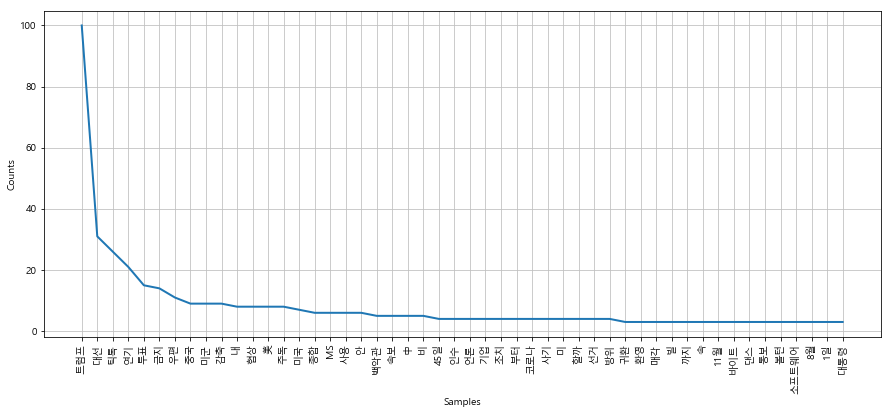

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [78]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [79]:
data = ko.vocab().most_common(300)

print(len(data))
data

300


[('트럼프', 100),
 ('대선', 31),
 ('틱톡', 26),
 ('연기', 21),
 ('투표', 15),
 ('금지', 14),
 ('우편', 11),
 ('중국', 9),
 ('미군', 9),
 ('감축', 9),
 ('내', 8),
 ('협상', 8),
 ('美', 8),
 ('주독', 8),
 ('미국', 7),
 ('종합', 6),
 ('MS', 6),
 ('사용', 6),
 ('안', 6),
 ('백악관', 5),
 ('속보', 5),
 ('中', 5),
 ('비', 5),
 ('45일', 4),
 ('인수', 4),
 ('언론', 4),
 ('기업', 4),
 ('조치', 4),
 ('부터', 4),
 ('코로나', 4),
 ('사기', 4),
 ('미', 4),
 ('할까', 4),
 ('선거', 4),
 ('방위', 4),
 ('귀환', 3),
 ('환영', 3),
 ('매각', 3),
 ('빌', 3),
 ('까지', 3),
 ('속', 3),
 ('11월', 3),
 ('바이트', 3),
 ('댄스', 3),
 ('통보', 3),
 ('볼턴', 3),
 ('소프트웨어', 3),
 ('8월', 3),
 ('1일', 3),
 ('대통령', 3),
 ('원하지', 3),
 ('않아', 3),
 ('전격', 3),
 ('거론', 3),
 ('..."', 3),
 ('사실', 3),
 ('상', 3),
 ('불가능', 3),
 ('오바마', 3),
 ('될', 3),
 ('호구', 3),
 ('1900', 2),
 ('고열', 2),
 ('견딘', 2),
 ('캡슐', 2),
 ('바다', 2),
 ('첨벙', 2),
 ('무사', 2),
 ('게이츠', 2),
 ('만에', 2),
 ('9월', 2),
 ('15일', 2),
 ('후퇴', 2),
 ('3일', 2),
 ('넘겨라', 2),
 ('저격', 2),
 ('연기론', 2),
 ('文', 2),
 ('하락', 2),
 ('또', 2),
 ('때리는', 2),
 ('흑인', 2)

In [80]:
# list tuple을 딕셔너리로 만들어주는 함수
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict

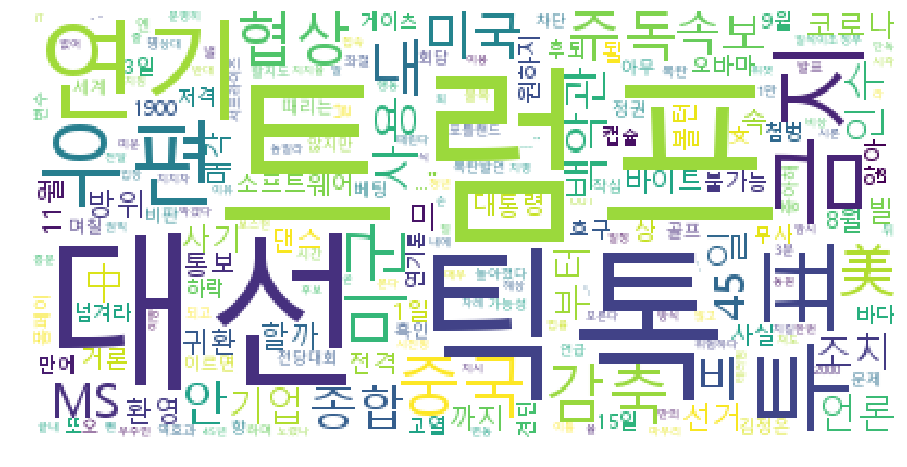

In [81]:
# 워드클라우드
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(todict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()